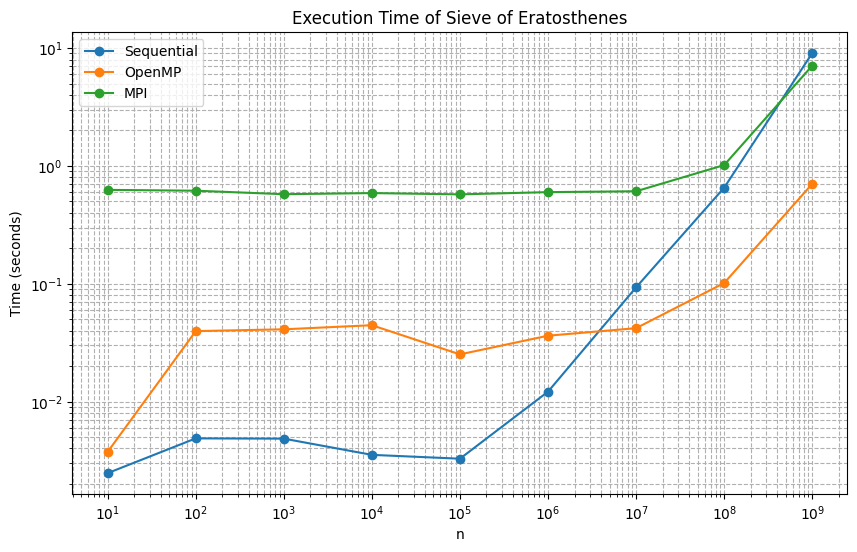

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results
df = pd.read_csv("/content/results.txt")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['n'], df['Sequential_Time'], label='Sequential', marker='o')
plt.plot(df['n'], df['OpenMP_Time'], label='OpenMP', marker='o')
plt.plot(df['n'], df['MPI_Time'], label='MPI', marker='o')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Execution Time of Sieve of Eratosthenes')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.savefig("execution_time_plot.png")
plt.show()


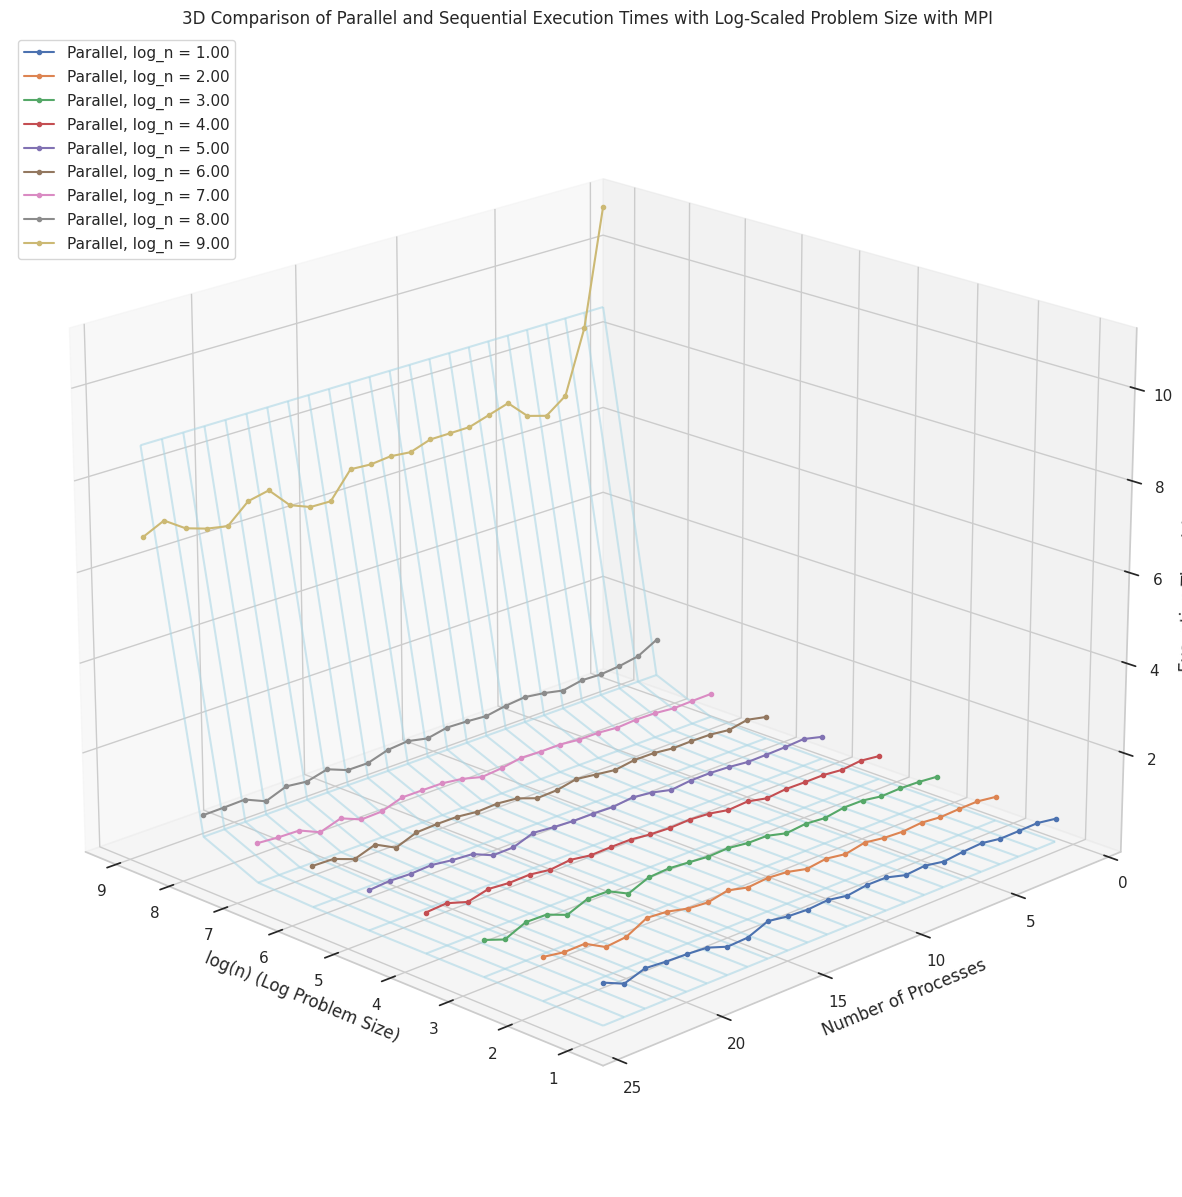

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load data
mpi_data = pd.read_csv('results_mpi.csv')
sequential_data = pd.read_csv('results_sequential.csv')

# Compute log(n) for consistent scaling on the x-axis
mpi_data['log_n'] = np.log10(mpi_data['n'])
sequential_data['log_n'] = np.log10(sequential_data['n'])

# Parameters
num_processes_max = 24  # Max number of processes for mesh replication

# Prepare sequential data for mesh creation by replicating it across multiple processes
log_n_seq = sequential_data['log_n'].values
exec_time_seq = sequential_data['Execution_Time'].values

# Create a grid of log(n) and execution time, replicated across `num_processes_max` processes
log_n_mesh, num_processes_mesh = np.meshgrid(log_n_seq, np.arange(1, num_processes_max + 1))
exec_time_mesh = np.tile(exec_time_seq, (num_processes_max, 1))

# Initialize the 3D plot
sns.set(style="whitegrid")
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Sort MPI data by log_n and num_processes to prepare for plotting
mpi_data_sorted = mpi_data.sort_values(by=['log_n', 'num_processes'])

# Plot parallel execution times with a marker
for log_n_value, group_data in mpi_data_sorted.groupby('log_n'):
    ax.plot(group_data['log_n'], group_data['num_processes'], group_data['Execution_Time'],
            label=f'Parallel, log_n = {log_n_value:.2f}', marker='.', zorder=5)

# Plot the replicated sequential execution wireframe
ax.plot_wireframe(log_n_mesh, num_processes_mesh, exec_time_mesh, color='lightblue', alpha=0.6,
                  rstride=1, cstride=1)

# Customize the view and labels
ax.view_init(elev=20, azim=135)
ax.set_xlabel('log(n) (Log Problem Size)')
ax.set_ylabel('Number of Processes')
ax.set_zlabel('Execution Time (s)')
ax.set_title('3D Comparison of Parallel and Sequential Execution Times with Log-Scaled Problem Size with MPI')

# Show the legend and display the plot
ax.legend(loc='upper left')
plt.show()


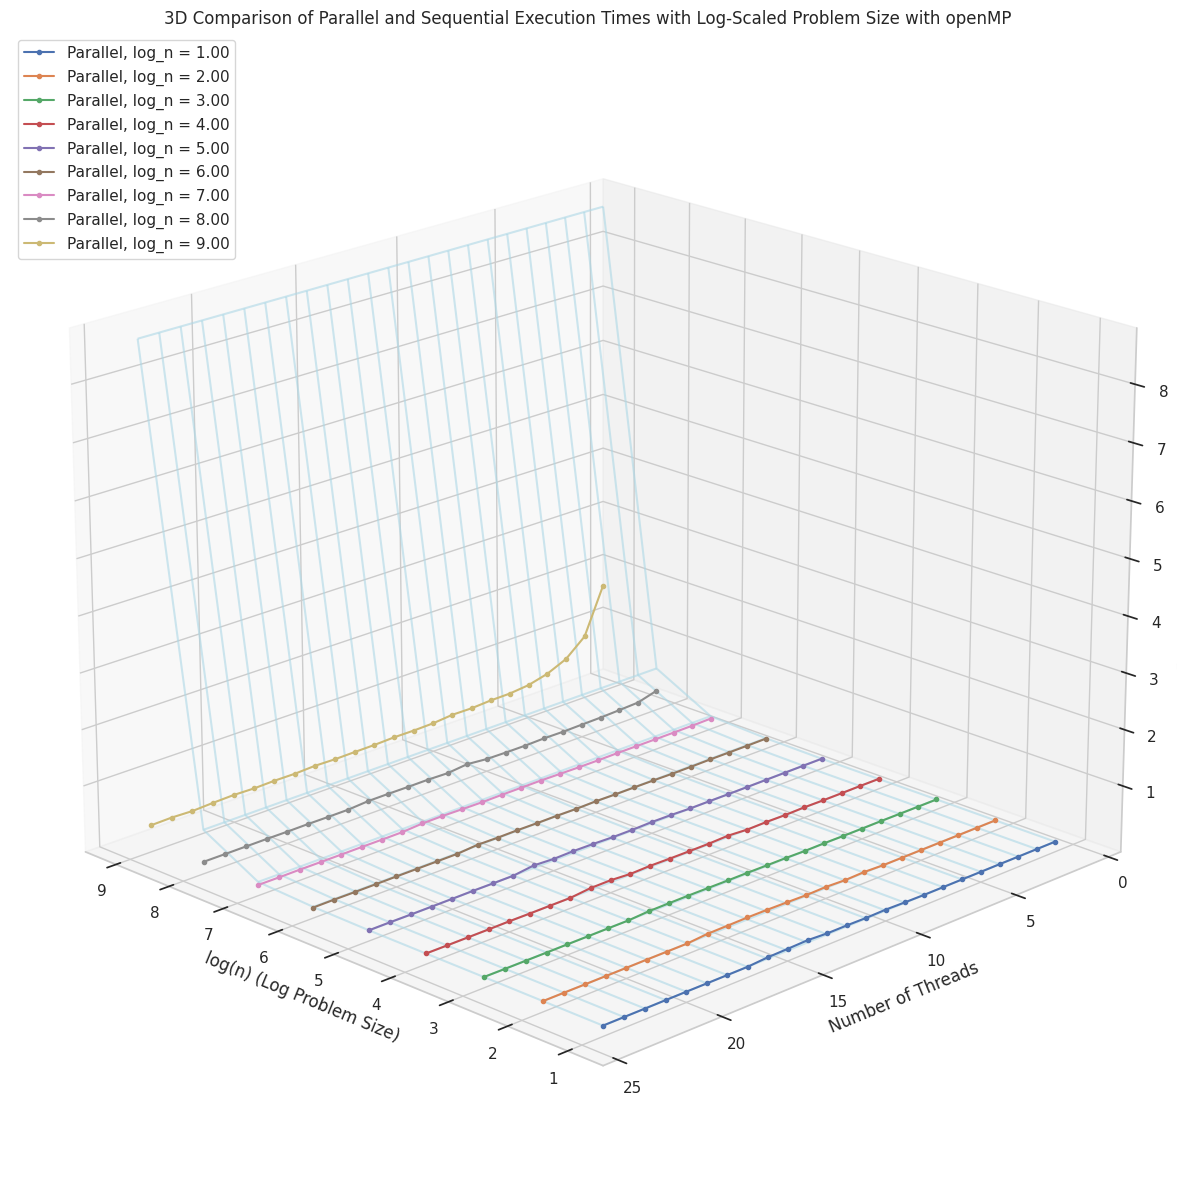

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load data
mpi_data = pd.read_csv('results_openmp.csv')
sequential_data = pd.read_csv('results_sequential.csv')

# Compute log(n) for consistent scaling on the x-axis
mpi_data['log_n'] = np.log10(mpi_data['n'])
sequential_data['log_n'] = np.log10(sequential_data['n'])

# Parameters
num_processes_max = 24  # Max number of processes for mesh replication

# Prepare sequential data for mesh creation by replicating it across multiple processes
log_n_seq = sequential_data['log_n'].values
exec_time_seq = sequential_data['Execution_Time'].values

# Create a grid of log(n) and execution time, replicated across `num_processes_max` processes
log_n_mesh, num_processes_mesh = np.meshgrid(log_n_seq, np.arange(1, num_processes_max + 1))
exec_time_mesh = np.tile(exec_time_seq, (num_processes_max, 1))

# Initialize the 3D plot
sns.set(style="whitegrid")
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Sort MPI data by log_n and num_processes to prepare for plotting
mpi_data_sorted = mpi_data.sort_values(by=['log_n', 'num_threads'])

# Plot parallel execution times with a marker
for log_n_value, group_data in mpi_data_sorted.groupby('log_n'):
    ax.plot(group_data['log_n'], group_data['num_threads'], group_data['Execution_Time'],
            label=f'Parallel, log_n = {log_n_value:.2f}', marker='.', zorder=5)

# Plot the replicated sequential execution wireframe
ax.plot_wireframe(log_n_mesh, num_processes_mesh, exec_time_mesh, color='lightblue', alpha=0.6,
                  rstride=1, cstride=1)

# Customize the view and labels
ax.view_init(elev=20, azim=135)
ax.set_xlabel('log(n) (Log Problem Size)')
ax.set_ylabel('Number of Threads')
ax.set_zlabel('Execution Time (s)')
ax.set_title('3D Comparison of Parallel and Sequential Execution Times with Log-Scaled Problem Size with openMP')

# Show the legend and display the plot
ax.legend(loc='upper left')
plt.show()


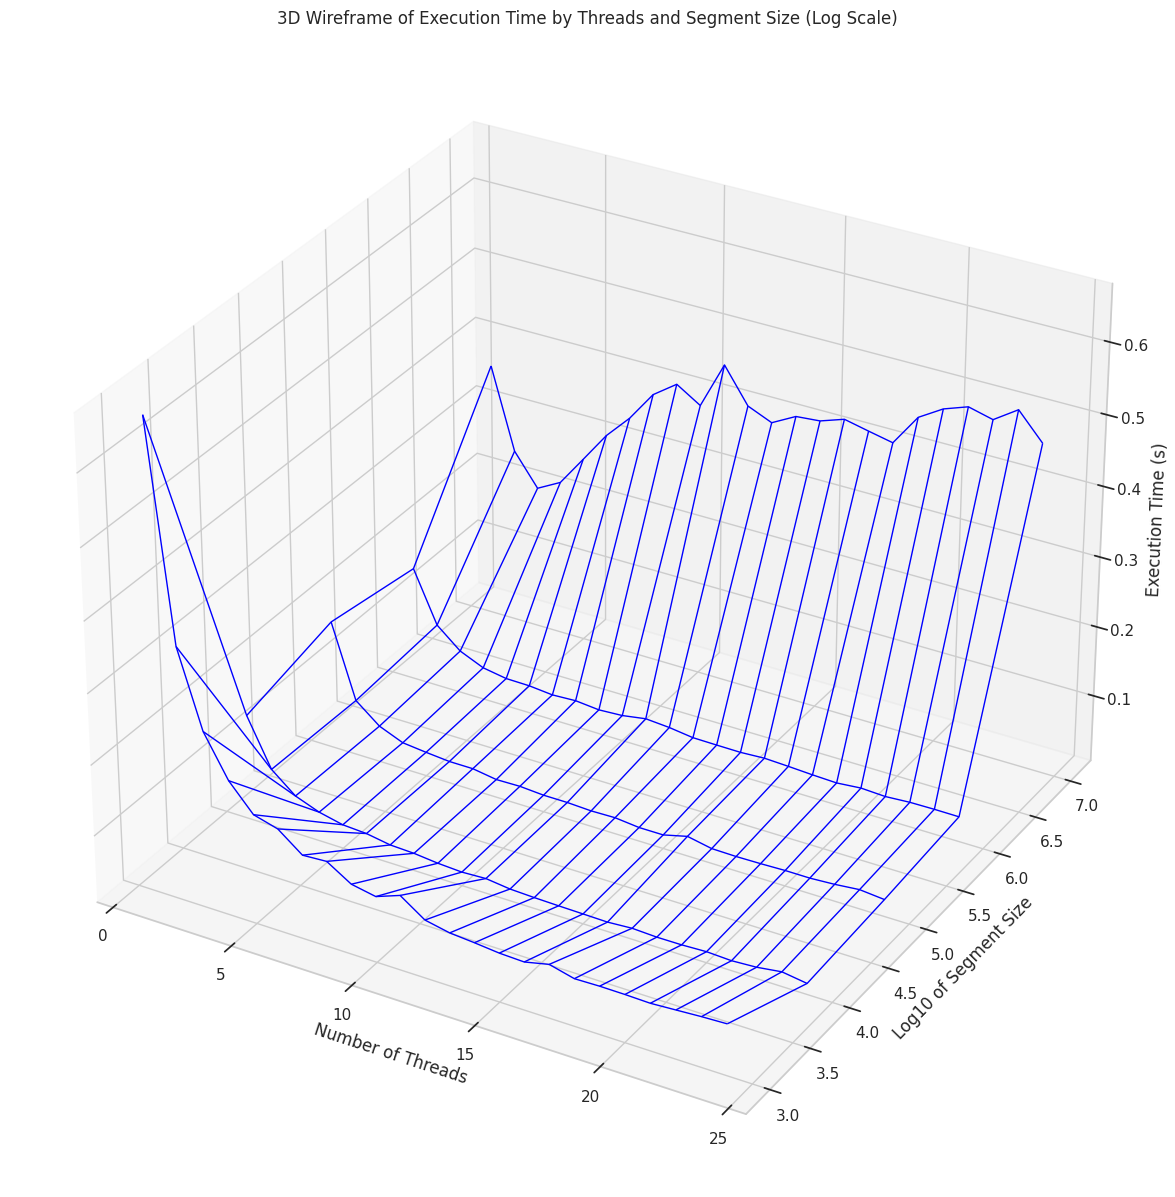

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
file_path = '/content/results_openmp_segmented.csv'
data = pd.read_csv(file_path)

# Extract data
num_threads = data['num_threads']
segment_size = data['segment_size']
execution_time = data['Execution_Time']

# Create a 3D wireframe plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the wireframe
unique_threads = np.unique(num_threads)
unique_segments = np.unique(segment_size)

# Generate meshgrid for threads and log scale segment sizes
X, Y = np.meshgrid(unique_threads, np.log10(unique_segments))
Z = np.zeros_like(X, dtype=float)

# Populate Z with execution time data for each (thread, segment_size) combination
for i in range(len(unique_threads)):
    for j in range(len(unique_segments)):
        # Filter execution time for current (thread, segment_size) combination
        exec_time = data[(data['num_threads'] == unique_threads[i]) &
                         (data['segment_size'] == unique_segments[j])]['Execution_Time']
        Z[j, i] = exec_time.iloc[0] if not exec_time.empty else np.nan

# Plot the wireframe
ax.plot_wireframe(X, Y, Z, color='blue', linewidth=1)

# Label the axes
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Log10 of Segment Size')
ax.set_zlabel('Execution Time (s)')
ax.set_title('3D Wireframe of Execution Time by Threads and Segment Size (Log Scale)')

# Show the plot
plt.show()
